# Conclusions from following tests:

# Best preprocessing for LGBM


# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


# Imports and data loading

In [1]:
# Imports
import numpy as np
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from matplotlib import cm

import lightgbm as lgb  # brew install lightgbm (on MacOS)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# 1. Simple one-hot-encoding
Result f1-score macro avg: **81.50616973784619 0.7829741677102143**

In [2]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [3]:
# Preprocessing
# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_test = X_test.drop('native-country_ Holand-Netherlands', axis=1)

In [4]:
# Model
base_model = lgb.LGBMClassifier(random_state=42)
cv_score_base = cross_val_score(base_model, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_base.mean(), cv_score_base.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.816, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.826, total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .................................... , score=0.813, total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV] .................................... , score=0.818, total=   1.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV] .................................... , score=0.802, total=   1.3s
0.8150616973784619 0.007829741677102143


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished


# 2. Droping missing values

no nan values, ' ?' instead

only for workclass, occupation and native-country

if workclass ' ?' => occupation also ' ?', so cannot infer missing workclass from occupation

we can either keep those missing values and consider them as an extra 'unknown' class or drop them.

Result f1-score macro avg: **81.51673090332775 0.9400768655536016** -> Light increase

In [10]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [11]:
# Preprocessing
# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_test = X_test.drop('native-country_ Holand-Netherlands', axis=1)

In [12]:
model_dropna = lgb.LGBMClassifier(random_state=42)
cv_score_dropna = cross_val_score(model_dropna, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_dropna.mean(), cv_score_dropna.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.813, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.828, total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .................................... , score=0.816, total=   1.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV] .................................... , score=0.819, total=   1.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s remaining:    0.0s


[CV] .................................... , score=0.800, total=   1.3s
0.8151673090332775 0.009400768655536016


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s finished


# 3. Countries

## 3.1. US vs NON-US

Result f1-score macro avg: **81.34343775867933 0.8226089277765103** -> Decrease

In [13]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [14]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# US vs NON US
X_train['native-country'][X_train['native-country'] != ' United-States'] = 'Non-United-States'
X_test['native-country'][X_test['native-country'] != ' United-States'] = 'Non-United-States'

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [16]:
model_usnonus = lgb.LGBMClassifier(random_state=42)
cv_score_usnonus = cross_val_score(model_usnonus, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_usnonus.mean(), cv_score_usnonus.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.813, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................... , score=0.826, total=   0.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] .................................... , score=0.813, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s remaining:    0.0s


[CV] .................................... , score=0.815, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] .................................... , score=0.800, total=   1.2s
0.8134343775867933 0.008226089277765103


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.8s finished


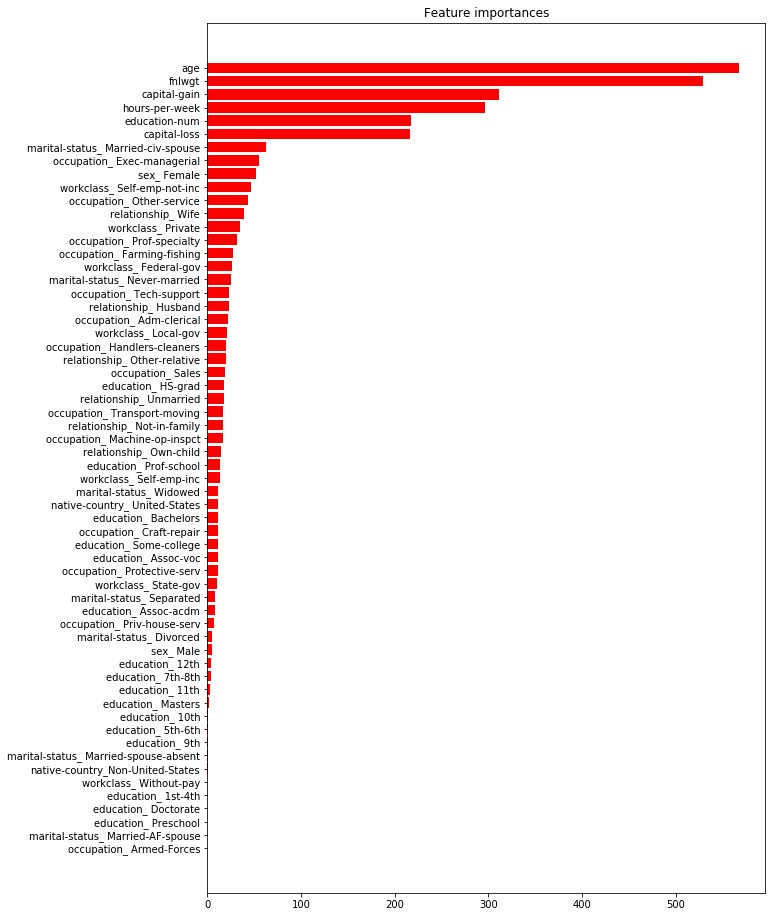

In [17]:
model_usnonus.fit(X_train, y_train)
importances = model_usnonus.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

## 3.2. Native country per world region

Result f1-score macro avg: **0.8146188557801823 0.00905210490151513**

In [18]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

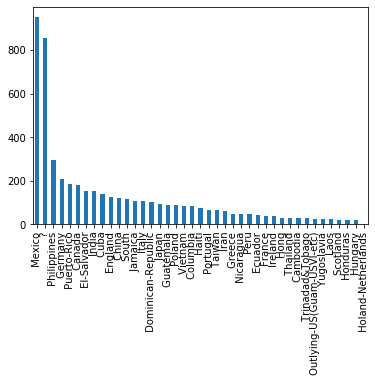

In [19]:
countries_distrib = pd.concat([X_train["native-country"], X_test["native-country"]], axis=0)
countries_distrib[countries_distrib != ' United-States'].value_counts().plot(kind='bar')

In [20]:
countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands', ' Ireland', ' Scotland'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "South-Europe": [' Italy', ' Portugal'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

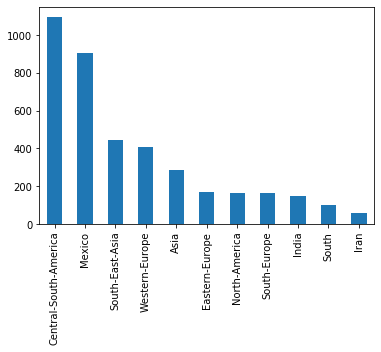

In [22]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Countries per region
for k, v in countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

countries_distrib = pd.concat([X_train["native-country"], X_test["native-country"]], axis=0)
countries_distrib[countries_distrib != 'United-States'].value_counts().plot(kind='bar')
    
# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [28]:
model_countriesregions = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions = cross_val_score(model_countriesregions, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions.mean(), cv_score_countriesregions.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.812, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.828, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.817, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.816, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV] .................................... , score=0.800, total=   0.3s
0.8146188557801823 0.00905210490151513


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


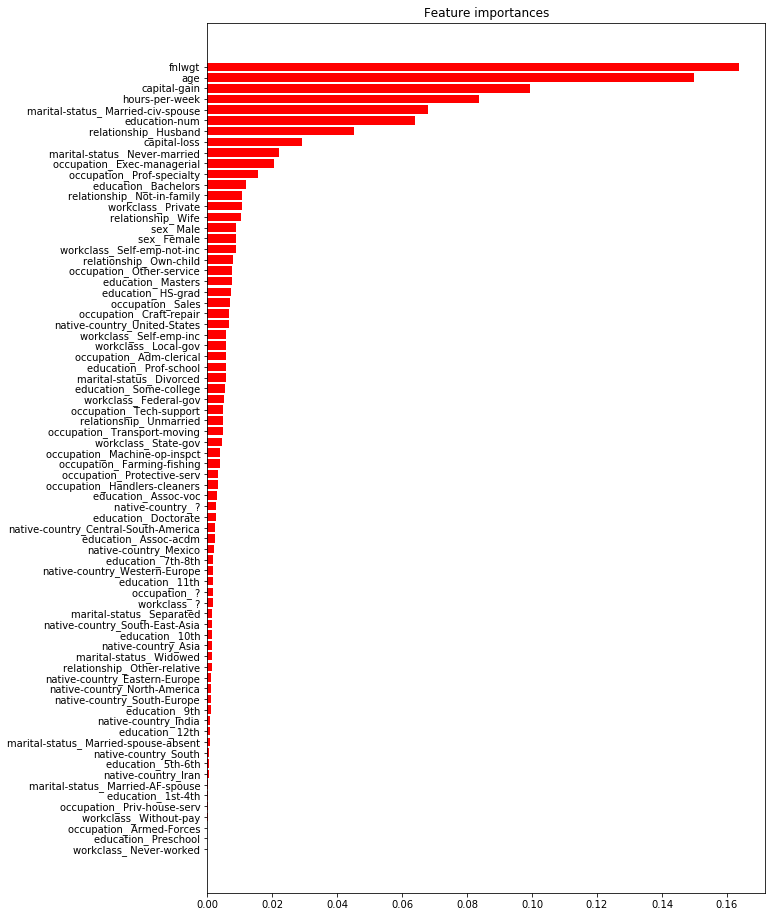

In [159]:
model_countriesregions.fit(X_train, y_train)
importances = model_countriesregions.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

##  3.3. New countries

**79.27027563899722 ± 1.1899513756445183**

In [29]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [30]:
# Preprocessing

new_countries = {
    "United-States": [' United-States'],
    "South-East-Asia": [' Philippines', ' Cambodia' ,' Laos', ' Vietnam', ' Thailand'],
    "North-America": [' Canada'],
    "Mexico": [' Mexico'],
    "Central-South-America": [' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
                              ' El-Salvador', ' Guatemala', ' Honduras', ' Jamaica', ' Peru',
                              ' Puerto-Rico', ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)',
                              ' Haiti', ' Nicaragua'],
    "Western-Europe": [' England', ' France', ' Germany', ' Holand-Netherlands',
                       ' Ireland', ' Scotland', ' Italy', ' Portugal'],
    "Eastern-Europe": [' Hungary', ' Greece', ' Yugoslavia', ' Poland'],
    "Asia": [' China', ' Hong', ' Japan', ' Taiwan'],
    "India": [' India'],
    "Iran": [' Iran'],
    "South": [' South'],
}

# Countries per region
for k, v in new_countries.items():
    X_train['native-country'] = X_train['native-country'].replace(v, k)
    X_test['native-country'] = X_test['native-country'].replace(v, k)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [260]:
model_newcountriesregions_fnlwgt_capital_education_spouse = RandomForestClassifier(n_estimators=1000, random_state=42)
cv_score_newcountriesregions_fnlwgt_capital_education_spouse = cross_val_score(model_newcountriesregions_fnlwgt_capital_education_spouse, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_newcountriesregions_fnlwgt_capital_education_spouse.mean(), cv_score_newcountriesregions_fnlwgt_capital_education_spouse.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.788, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] .................................... , score=0.816, total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] .................................... , score=0.791, total= 2.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.8min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.1min remaining:    0.0s


[CV] .................................... , score=0.784, total= 1.5min
0.7927027563899722 0.011899513756445183


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.6min finished


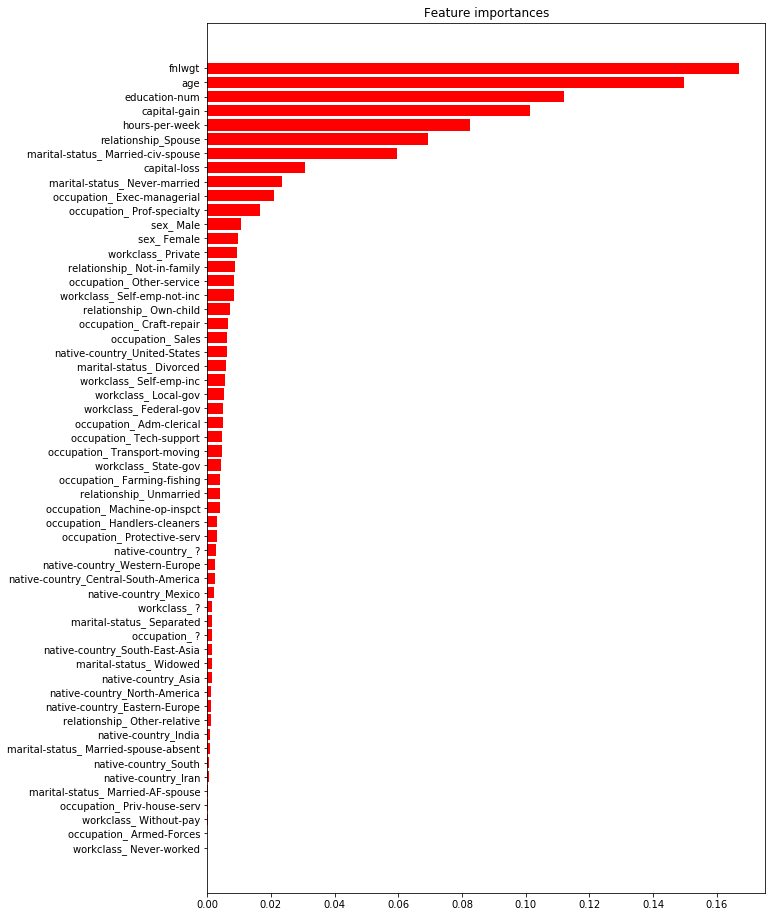

In [265]:
model_newcountriesregions_fnlwgt_capital_education_spouse.fit(X_train, y_train)
importances = model_newcountriesregions_fnlwgt_capital_education_spouse.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 3.4 Clustering countries

In [282]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [283]:
# Preprocessing

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

X_train = X_train.drop("native-country", axis=1)
X_test = X_test.drop("native-country", axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


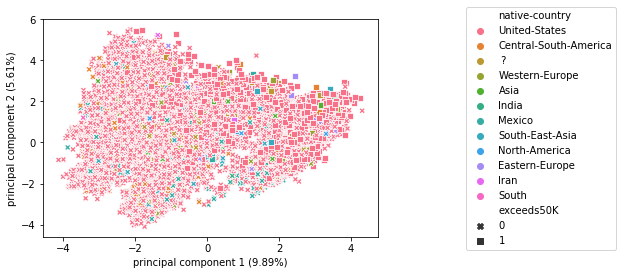

In [284]:
X_train_norm = StandardScaler().fit_transform(X_train)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_norm)
principalComponents = pca.transform(X_train_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])

# Countries per region
for k, v in new_countries.items():
    train['native-country'] = train['native-country'].replace(v, k)

finalDf = pd.concat([principalDf, train["exceeds50K"], train['native-country']], axis = 1)
finalDf = finalDf[finalDflDf['native-country'] != 'United-States']

markers = {0: "X", 1: "s"}


plt.figure()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full", palette="Set2")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

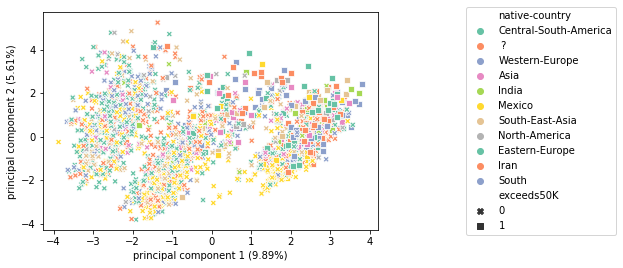

In [287]:
finalDf = finalDf[finalDf['native-country'] != 'United-States']


plt.figure()
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    style="exceeds50K", markers=markers, hue="native-country", data=finalDf,legend="full", palette="Set2")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# 4. Age to age-bin -> bin of 5 years

0.81448758600595 0.009125231534997919

In [31]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [32]:
bins = np.arange(15, 95, 5)
X_train["age-bin"] = pd.cut(X_train["age"], bins=bins, include_lowest=True)
train["age-bin"] = pd.cut(train["age"], bins=bins, include_lowest=True)
X_test["age-bin"] = pd.cut(X_test["age"], bins=bins, include_lowest=True)

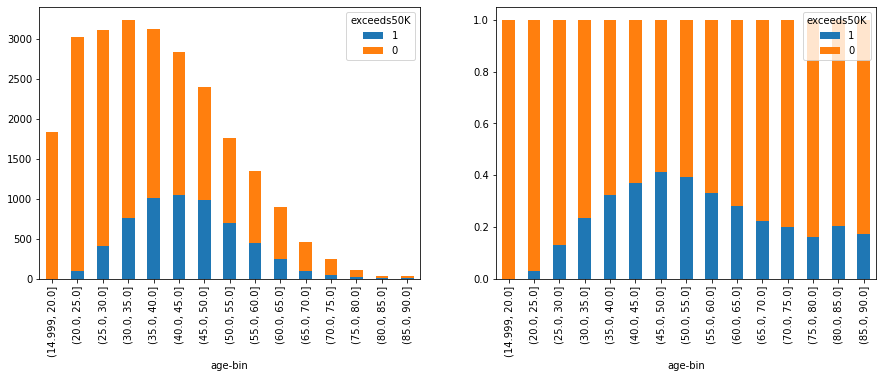

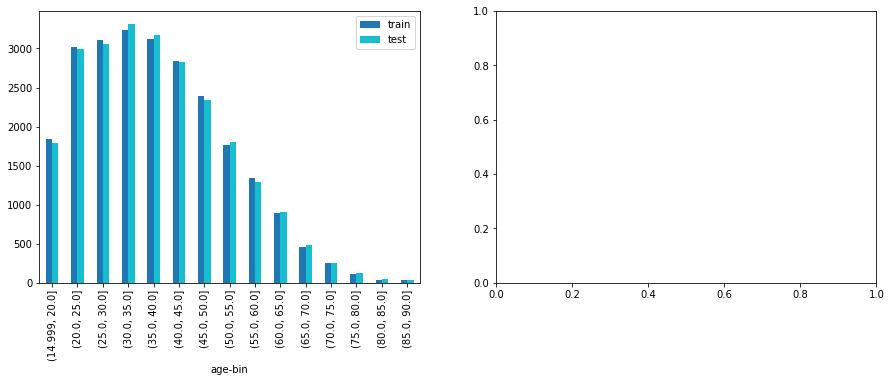

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
df_plot = train.groupby(['age-bin', 'exceeds50K']).size().reset_index().pivot(columns='exceeds50K', index='age-bin', values=0).sort_index(ascending=False, axis=1)
df_plot.plot(kind='bar', stacked=True, ax=axs[0])
df_plot = df_plot.div(df_plot.sum(axis=1), axis=0)
df_plot.plot(kind='bar', stacked=True, ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(15,5))
df_plot = pd.concat([X_train.groupby(['age-bin']).size(), X_test.groupby(['age-bin']).size()], axis=1)
df_plot.columns = ["train", "test"]
df_plot.plot(kind='bar', ax=axs[0], cmap=cm.get_cmap('tab10'))

In [34]:
# Preprocessing
# Age bin
X_train = X_train.drop(['age'], axis=1)
X_test = X_test.drop(['age'], axis=1)

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [36]:
model_countriesregions_agebin = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_agebin = cross_val_score(model_countriesregions_agebin, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_agebin.mean(), cv_score_countriesregions_agebin.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.813, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................................... , score=0.829, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... , score=0.816, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV] .................................... , score=0.814, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.801, total=   0.3s
0.81448758600595 0.009125231534997919


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


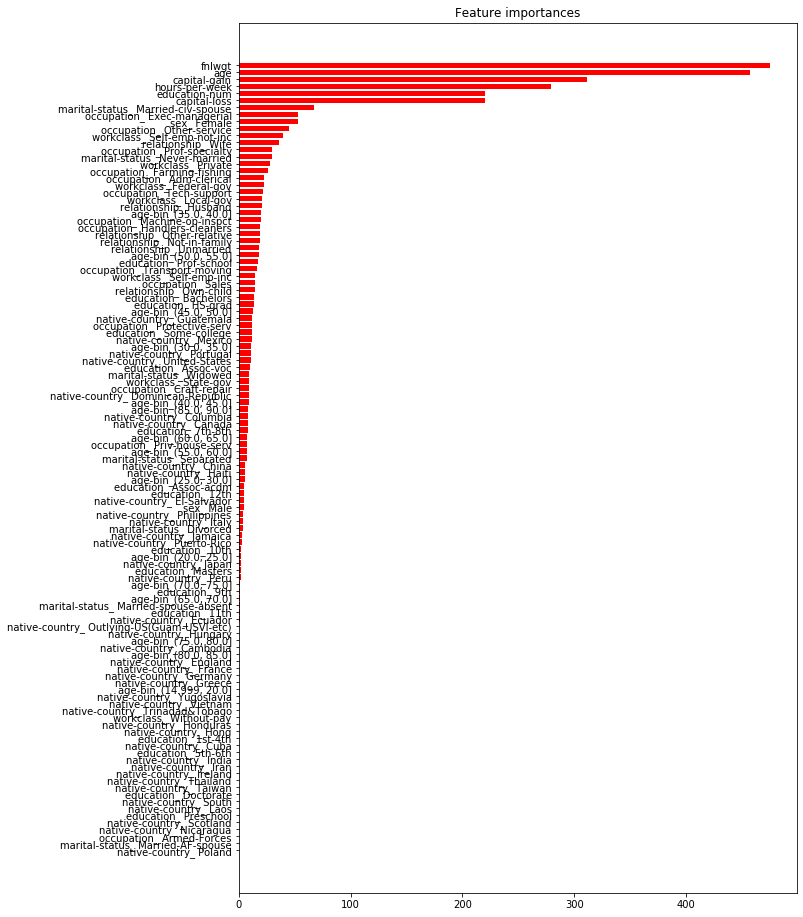

In [37]:
model_countriesregions_agebin.fit(X_train, y_train)
importances = model_countriesregions_agebin.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 5. Fnlwgt

**0.8151673090332775 0.009400768655536016**

In [38]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

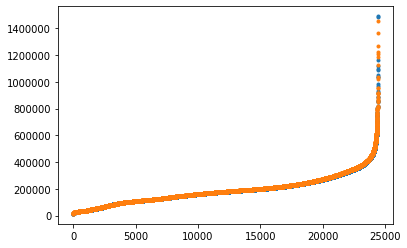

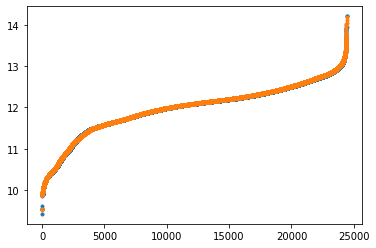

In [39]:
plt.plot(np.sort(X_train['fnlwgt'].values), '.')
plt.plot(np.sort(X_test['fnlwgt'].values), '.')

plt.figure()
plt.plot(np.sort(np.log(X_train['fnlwgt'].values)), '.')
plt.plot(np.sort(np.log(X_test['fnlwgt'].values)), '.')

In [40]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log fnlwgt
X_train['fnlwgt'] = np.log(X_train['fnlwgt'])
X_test['fnlwgt'] = np.log(X_test['fnlwgt'])

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [42]:
model_countriesregions_agebin_fnlwgt = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_agebin_fnlwgt = cross_val_score(model_countriesregions_agebin_fnlwgt, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_agebin_fnlwgt.mean(), cv_score_countriesregions_agebin_fnlwgt.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.813, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................................... , score=0.828, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... , score=0.816, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.819, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.800, total=   0.3s
0.8151673090332775 0.009400768655536016


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished


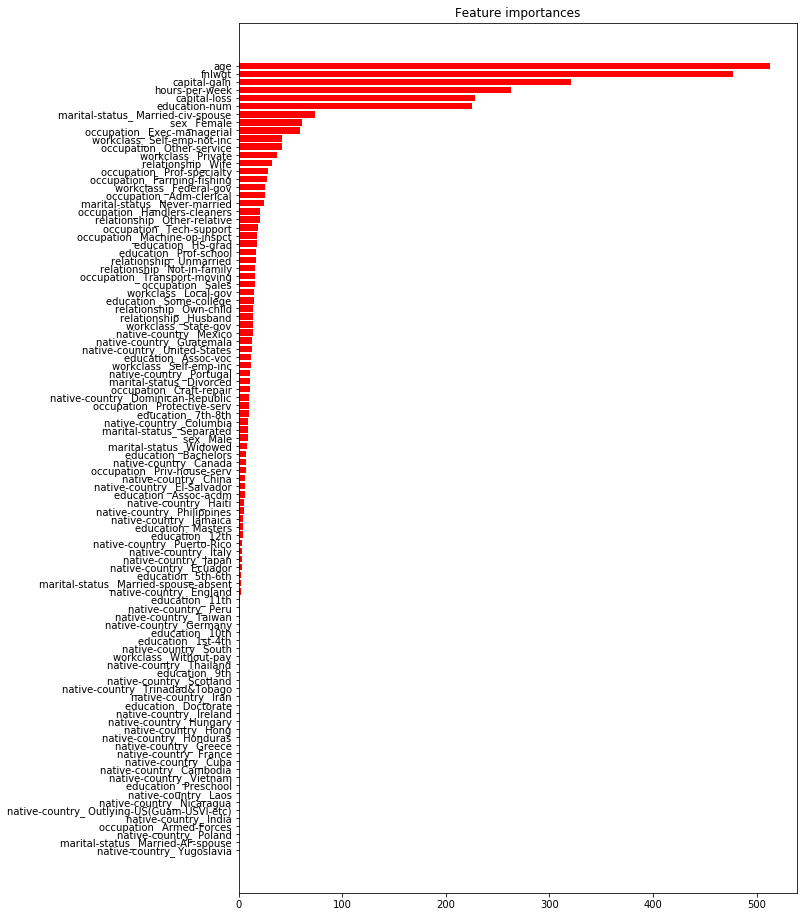

In [43]:
model_countriesregions_agebin_fnlwgt.fit(X_train, y_train)
importances = model_countriesregions_agebin_fnlwgt.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 6. Capital gain & Capital Loss

**0.8151673090332775 0.009400768655536016**

In [53]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/hanae/opt/anaconda3/l

-inf
-inf
-inf
-inf
count    24421.000000
mean         0.734740
std          2.457822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital-gain, dtype: float64
count    24421.000000
mean         0.348782
std          1.580824
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.268732
Name: capital-loss, dtype: float64
count    24421.000000
mean         0.722308
std          2.432993
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.512915
Name: capital-gain, dtype: float64
count    24421.000000
mean         0.353111
std          1.591415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.379309
Name: capital-loss, dtype: float64


/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log


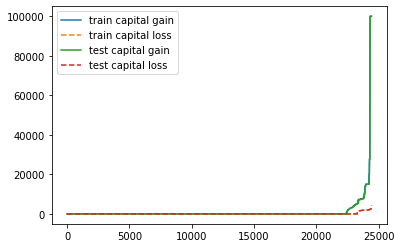

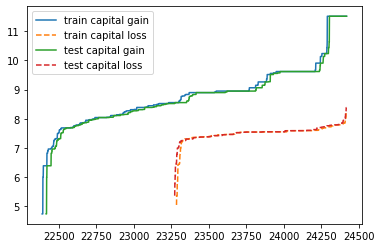

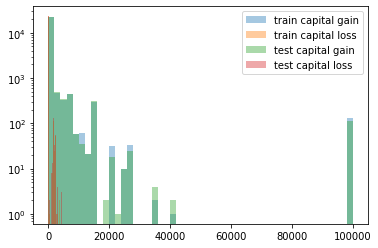

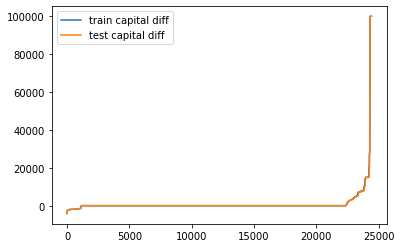

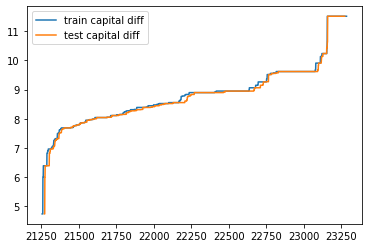

In [45]:
plt.plot(np.sort(X_train['capital-gain'].values), '-', label="train capital gain")
plt.plot(np.sort(X_train['capital-loss'].values), '--', label="train capital loss")
plt.plot(np.sort(X_test['capital-gain'].values), '-', label="test capital gain")
plt.plot(np.sort(X_test['capital-loss'].values), '--', label="test capital loss")
plt.legend()

plt.figure()
plt.plot(np.sort(np.log(X_train['capital-gain'].values)), '-', label="train capital gain")
plt.plot(np.sort(np.log(X_train['capital-loss'].values)), '--', label="train capital loss")
plt.plot(np.sort(np.log(X_test['capital-gain'].values)), '-', label="test capital gain")
plt.plot(np.sort(np.log(X_test['capital-loss'].values)), '--', label="test capital loss")
plt.legend()

print(min(np.log(X_train['capital-gain'].values)))
print(min(np.log(X_test['capital-loss'].values)))
print(min(np.log(X_train['capital-gain'].values)))
print(min(np.log(X_test['capital-loss'].values)))

print(np.log(X_train['capital-gain']).replace(-np.inf, 0).describe())
print(np.log(X_train['capital-loss']).replace(-np.inf, 0).describe())
print(np.log(X_test['capital-gain']).replace(-np.inf, 0).describe())
print(np.log(X_test['capital-loss']).replace(-np.inf, 0).describe())


plt.figure()
sns.distplot(X_train['capital-gain'].values, label="train capital gain", kde=False, hist_kws={'log':True})
sns.distplot(X_train['capital-loss'].values, label="train capital loss", kde=False, hist_kws={'log':True})
sns.distplot(X_test['capital-gain'].values,  label="test capital gain", kde=False, hist_kws={'log':True})
sns.distplot(X_test['capital-loss'].values, label="test capital loss", kde=False, hist_kws={'log':True})
plt.legend()

plt.figure()
plt.plot(np.sort(X_train['capital-gain'].values - X_train['capital-loss'].values), '-', label="train capital diff")
plt.plot(np.sort(X_test['capital-gain'].values - X_test['capital-loss'].values), '-', label="test capital diff")
plt.legend()

plt.figure()
plt.plot(np.sort(np.log(X_train['capital-gain'].values - X_train['capital-loss'].values)), '-', label="train capital diff")
plt.plot(np.sort(np.log(X_test['capital-gain'].values - X_test['capital-loss'].values)), '-', label="test capital diff")
plt.legend()

In [54]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [55]:
model_countriesregions_fnlwgt_capital = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital = cross_val_score(model_countriesregions_fnlwgt_capital, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital.mean(), cv_score_countriesregions_fnlwgt_capital.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.813, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................................... , score=0.828, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .................................... , score=0.816, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV] .................................... , score=0.819, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.4s remaining:    0.0s


[CV] .................................... , score=0.800, total=   0.3s
0.8151673090332775 0.009400768655536016


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


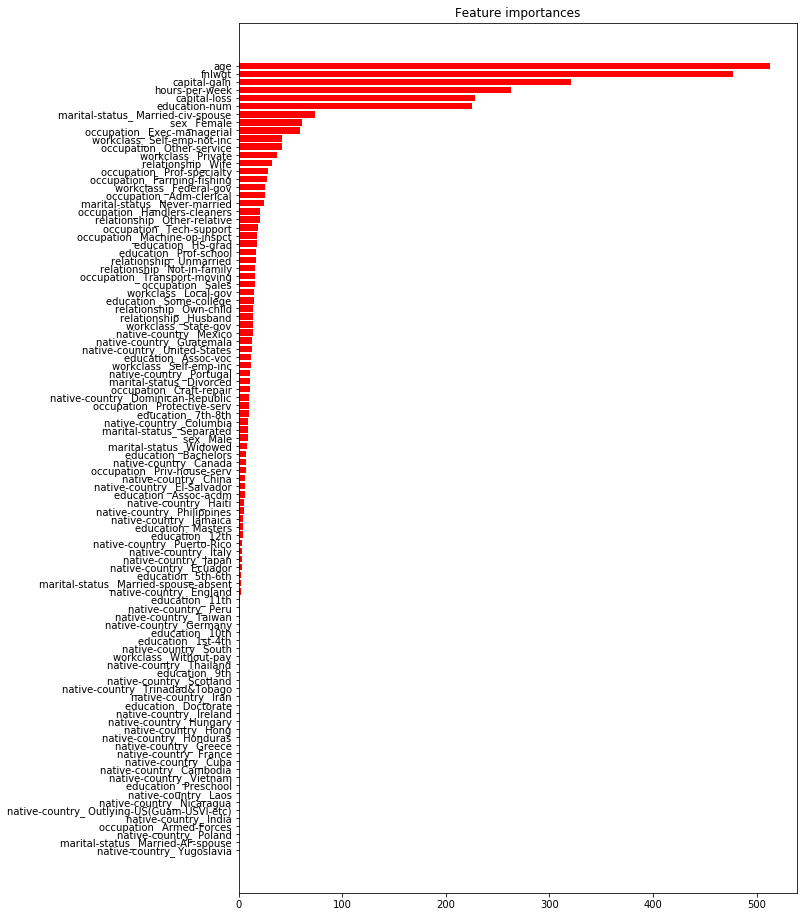

In [56]:
model_countriesregions_fnlwgt_capital.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 7. Remove education, only education num

**0.8158057503806331 0.0076638343560730005**

In [57]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [58]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [59]:
model_countriesregions_fnlwgt_capital_education = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education = cross_val_score(model_countriesregions_fnlwgt_capital_education, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education.mean(), cv_score_countriesregions_fnlwgt_capital_education.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.820, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.826, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.815, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.816, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] .................................... , score=0.803, total=   0.3s
0.8158057503806331 0.0076638343560730005


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


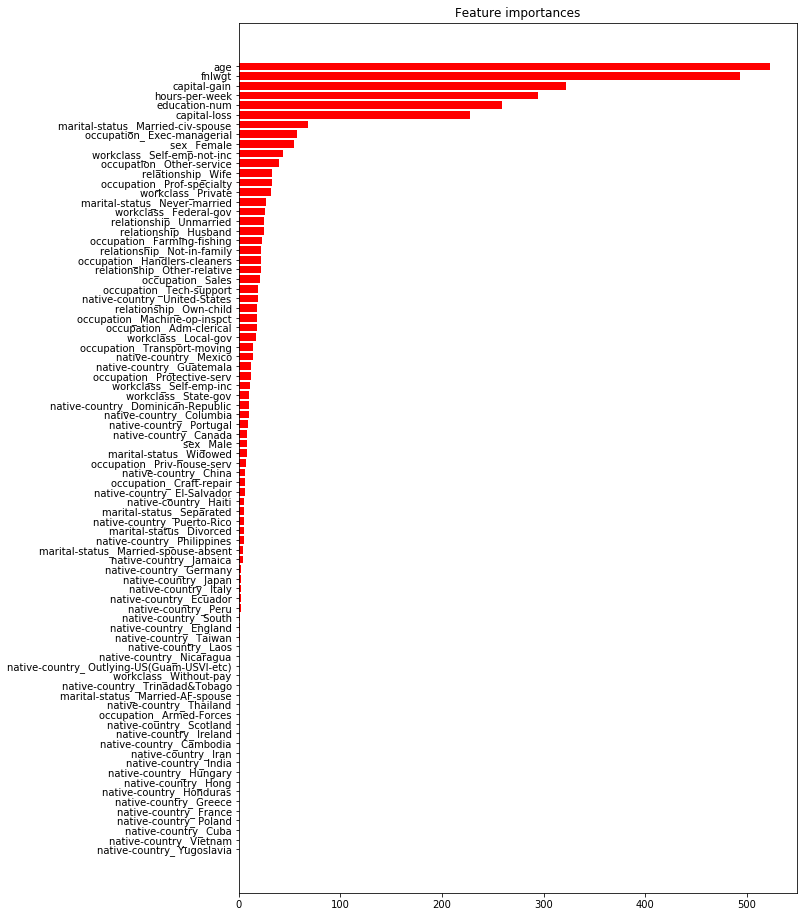

In [60]:
model_countriesregions_fnlwgt_capital_education.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

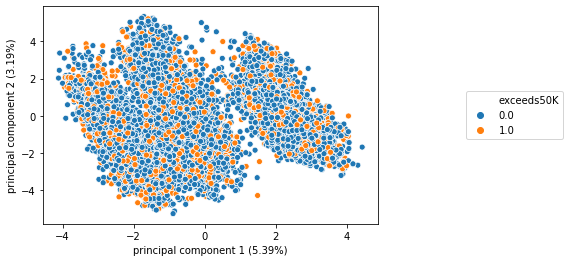

In [61]:
X_train_norm = StandardScaler().fit_transform(X_train)  # standadize before PCA

pca = PCA(n_components=2, random_state=0)
pca.fit(X_train_norm)
principalComponents = pca.transform(X_train_norm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                                                                  'principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100)])
finalDf = pd.concat([principalDf, train["exceeds50K"]], axis = 1)

markers = {0: "X", 1: "s"}

plt.figure()
f = sns.scatterplot(x='principal component 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0]*100),
                    y='principal component 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1]*100),
                    hue="exceeds50K", data=finalDf, legend="full")
f.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# 8. Normalize

**0.8141881670606731 0.010070294793257214**

In [62]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [63]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)


# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# StandardScaler
col_names = ['fnlwgt', 'age', 'capital-gain', 'capital-loss', 'education-num', 'hours-per-week']
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[col_names] = features
features = X_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test[col_names] = features

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [65]:
model_countriesregions_fnlwgt_capital_education_norm = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_norm = cross_val_score(model_countriesregions_fnlwgt_capital_education_norm, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_norm.mean(), cv_score_countriesregions_fnlwgt_capital_education_norm.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.815, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.830, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.814, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.814, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] .................................... , score=0.798, total=   0.3s
0.8141881670606731 0.010070294793257214


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


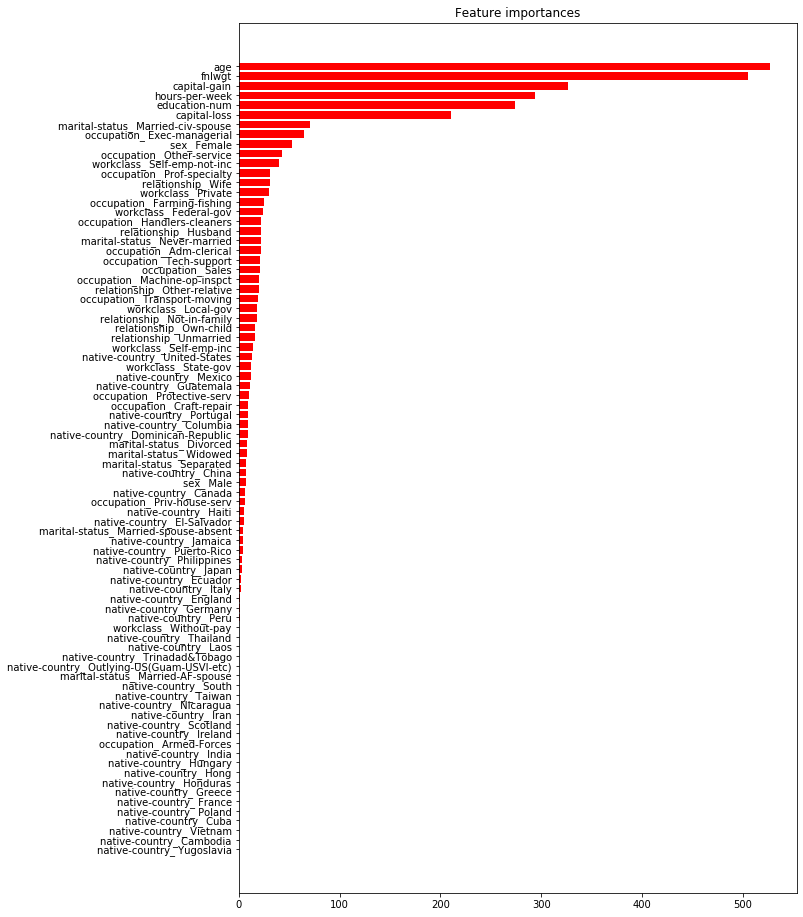

In [66]:
model_countriesregions_fnlwgt_capital_education_norm.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education_norm.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 9. Marital status & Relationship

husband and wife -> spouse

0.7917335796094639 0.01219740388019095

In [67]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [68]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

X_train['relationship'] = X_train['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')
X_test['relationship'] = X_test['relationship'].replace(to_replace =[" Wife", " Husband"], value='Spouse')

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
model_countriesregions_fnlwgt_capital_education_spouse = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse, X_train, y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.815, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................................... , score=0.827, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.815, total=   0.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV] .................................... , score=0.815, total=   0.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.3s remaining:    0.0s


[CV] .................................... , score=0.800, total=   0.3s
0.8145104087446959 0.008337957837554175


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


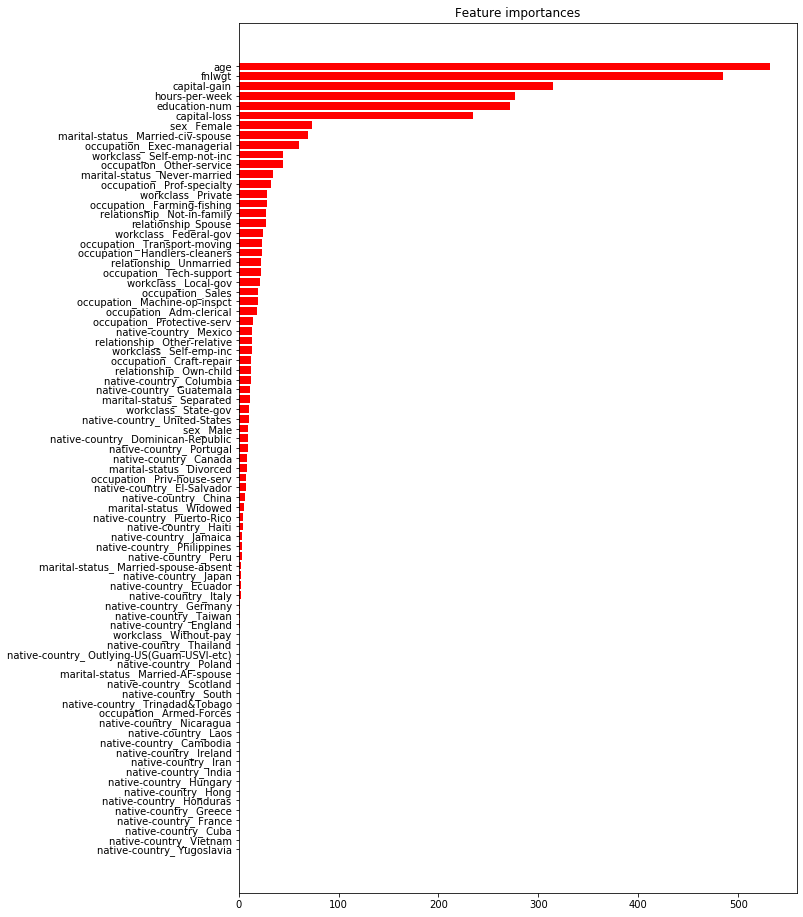

In [71]:
model_countriesregions_fnlwgt_capital_education_spouse.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education_spouse.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 10. PCA 

In [72]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [73]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


# PCA 
X_train_norm = StandardScaler().fit_transform(X_train)  # standadize before PCA

pca = PCA(random_state=0)
pca.fit(X_train_norm)
principalComponents = pca.transform(X_train_norm)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


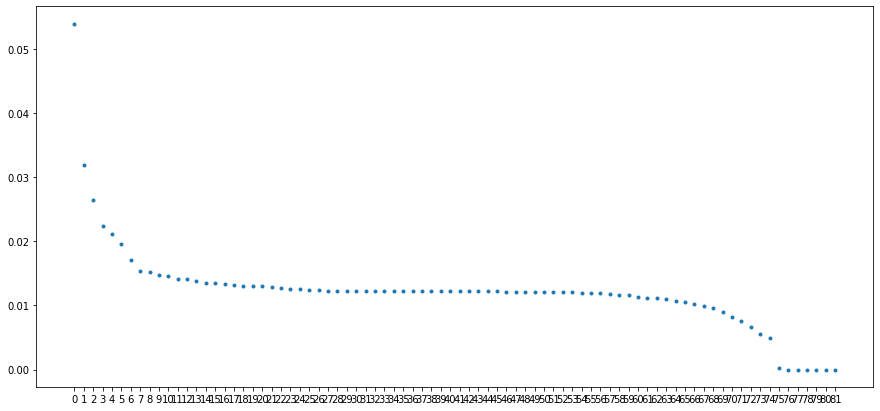

In [74]:
# Visualise PC compoents
plt.figure(figsize=(15,7))
plt.plot(pca.explained_variance_ratio_, '.')
plt.xticks(np.arange(len(pca.explained_variance_ratio_)), np.arange(len(pca.explained_variance_ratio_)))
plt.show()

In [75]:
model_countriesregions_fnlwgt_capital_education_spouse_PCA = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_PCA = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_PCA, principalComponents[:, :74], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_PCA.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_PCA.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.779, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .................................... , score=0.794, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] .................................... , score=0.781, total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] .................................... , score=0.786, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.6s remaining:    0.0s


[CV] .................................... , score=0.764, total=   1.0s
0.7807003997528325 0.010057552832081665


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s finished


# 11. Marital status: married VS not married

0.7794805088759358 0.006770938901376436

In [76]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [77]:
# Preprocessing

marital = {
    "married": [' Married-civ-spouse', ' Married-AF-spouse', ' Married-spouse-absent'],
    "never-married": [ ' Never-married'],
    "not-married": [' Divorced', ' Separated', ' Widowed']
}

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
X_train.groupby(["marital-status", "relationship"]).size()

KeyError: 'marital-status'

In [79]:
model_countriesregions_fnlwgt_capital_education_spouse_marital = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_marital = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_marital, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_marital.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_marital.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.775, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.790, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.780, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .................................... , score=0.782, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] .................................... , score=0.770, total=   0.6s
0.7794805088759358 0.006770938901376436


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


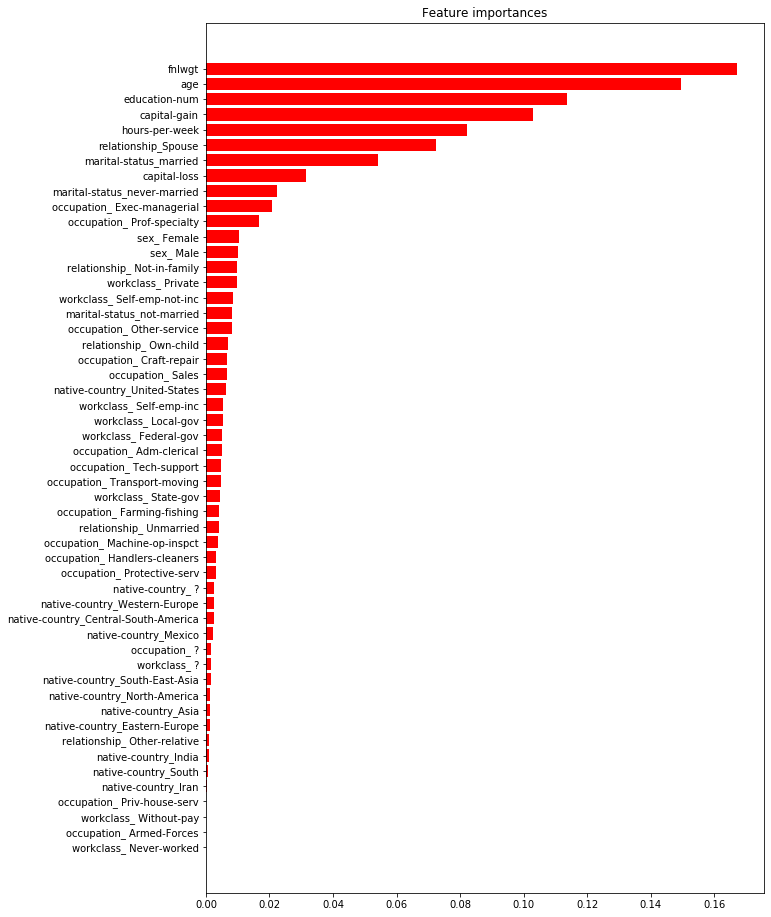

In [342]:
model_countriesregions_fnlwgt_capital_education_spouse_marital.fit(X_train, y_train)
importances = model_countriesregions_fnlwgt_capital_education_spouse_marital.feature_importances_
indices = np.argsort(importances)[::-1]
colnames = list(X_train)

fig, ax = plt.subplots(1, 1, figsize=(10,16))
ax.set_title("Feature importances")
ax.barh(range(len(colnames)), importances[indices[::-1]],
        color="r", align="center")
ax.set_yticks(range(len(colnames)))
ax.set_yticklabels(np.array(colnames)[indices][::-1])
plt.show()

# 12. Job -> unemployed

0.7794805088759358 0.006770938901376436

In [80]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [81]:
# Preprocessing

X_train['workclass'][X_train['workclass'] == " Never-worked"] = "Unemployed"
X_train['workclass'][X_train['workclass'] == " Without-pay"] = "Unemployed"

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [83]:
model_countriesregions_fnlwgt_capital_education_spouse_job = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_job = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_job, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_job.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_job.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.775, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.790, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .................................... , score=0.780, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .................................... , score=0.782, total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV] .................................... , score=0.770, total=   0.7s
0.7794805088759358 0.006770938901376436


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


# Select K-best

0.7794805088759358 0.006770938901376436



In [99]:
# Load data train and test
train = pd.read_csv(os.path.join("cs5228", "train.csv"))
X_train = train.drop(["exceeds50K"], axis=1)
y_train = train["exceeds50K"]
X_test = pd.read_csv(os.path.join("cs5228", "test.csv"))

In [100]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

features = X_train.columns

# Select K best
select = SelectKBest(k=50)
select.fit(X_train, y_train)
selected_features = features[select.get_support()]
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [101]:
model_countriesregions_fnlwgt_capital_education_spouse_Kbest = lgb.LGBMClassifier(random_state=42)
cv_score_countriesregions_fnlwgt_capital_education_spouse_Kbest = cross_val_score(model_countriesregions_fnlwgt_capital_education_spouse_Kbest, principalComponents[:, :48], y_train, cv=5, verbose=6, scoring='f1_macro')
print(cv_score_countriesregions_fnlwgt_capital_education_spouse_Kbest.mean(), cv_score_countriesregions_fnlwgt_capital_education_spouse_Kbest.std())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.775, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .................................... , score=0.790, total=   0.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] .................................... , score=0.780, total=   0.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s


[CV] .................................... , score=0.782, total=   0.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] .................................... , score=0.770, total=   0.6s
0.7794805088759358 0.006770938901376436


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


# Conclusion

In [103]:
# Preprocessing

# droping missing values 
train = train.replace(' ?', np.nan)
train = train.dropna()
X_test = X_test.replace(' ?', np.nan)
X_test = X_test.dropna()
y_train = train["exceeds50K"]
X_train = train.drop(["exceeds50K"], axis=1)

# Log capital gain and loss
X_train['capital-gain'] = np.log(X_train['capital-gain']).replace(-np.inf, 0)
X_train['capital-loss'] = np.log(X_train['capital-loss']).replace(-np.inf, 0)
X_test['capital-gain'] = np.log(X_test['capital-gain']).replace(-np.inf, 0)
X_test['capital-loss'] = np.log(X_test['capital-loss']).replace(-np.inf, 0)

# Drop education, keep only education-num
X_train = X_train.drop(['education'], axis=1)
X_test = X_test.drop(['education'], axis=1)

# One-hot-encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

/Users/hanae/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
